[2025-06-20 Fiddler](https://thefiddler.substack.com/p/how-greedily-can-you-mow-the-lawn)
====================

Fiddler
-------
My initial guess is 4.  The first pass goes right through the center.
The second pass is the same, rotated by 90°.  The last two passes clear
the remaining 4 patches.  I don't know if it's possible for the third
pass to clear more than half of what remains.  Eyeballing, I'd say no.

Any rotation of the second pass away from 90° from the first pass increases its
overlap with the first pass, and any translation of the second pass from being
centered at the circle center, unless the rotation is less than 60° from the first
pass, decreases the amount cut.

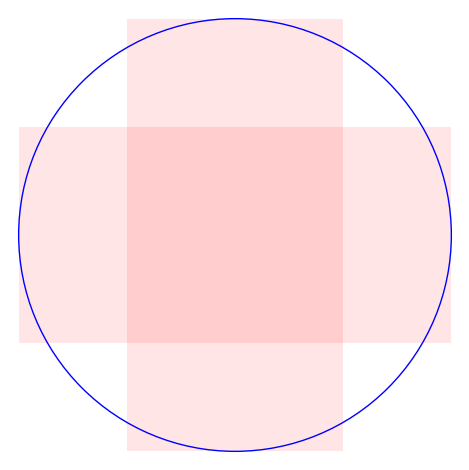

In [1]:
(circle((0,0),1,axes=false)
 + polygon([(-1/2,1),(1/2,1),(1/2,-1),(-1/2,-1)],color='red',alpha=0.1)
 + polygon([(1,1/2),(1,-1/2),(-1,-1/2),(-1,1/2)],color='red',alpha=0.1)
)

In [2]:
pass1 = 4*integral(sqrt(1-x^2),x,0,1/2)
pass2 = pass1 - 1
pass3 = (pi - pass1 - pass2)/2
show((pass1,pass2,pass3))
(numerical_approx(pass1/pi),numerical_approx(pass2/pi),numerical_approx(pass3/pi))

(1/3*pi + 1/2*sqrt(3), 1/3*pi + 1/2*sqrt(3) - 1, 1/6*pi - 1/2*sqrt(3) + 1/2)

(0.608997781044229, 0.290687894860439, 0.0501571620476660)

So the first pass gets about 60.9%, the second pass gets about 29.1%, and
the third and fourth passes get about 5.0%.

Extra credit
------------
The first pass clearly must be centered around the center of the sphere, boring out
approximately 35% of the volume.

In [3]:
pass1 = pi/4*sqrt(3) + 2*integral(pi*(1-x^2), x, sqrt(3)/2, 1)
show(pass1)
numerical_approx(pass1/(4*pi/3))

-1/12*pi*(9*sqrt(3) - 16) + 1/4*sqrt(3)*pi

0.350480947161671

I'm guessing that the second and third passes are also centered around the center
of the sphere, but rotated 90° from the first pass and each other.  I'm finding it
difficult to picture what the fourth pass could be.

Another candidate for the second or third pass would be parallel to the first pass.

The 3rd-4th-5th-6th passes could also be perpendicular to the first and second passes,
but offset from the center.

Making the $\lfloor$rounds$\rceil$
----------------------------------
Region $R$ is clearly the annulus between circles of radii $\sqrt{98}$ and $\sqrt{99}$,
so its area is $\pi$.

For region $Q$, when $n \le x^2 < n+1$, $98-n \le y^2 < 99-n$, and its area
is slightly more than $\pi$.

In [4]:
q = 4*sum([(sqrt(n+1)-sqrt(n))*(sqrt(99-n)-sqrt(98-n)) for n in [0..98]])
numerical_approx(q)

3.14201553570153

For region $P$,
when $\sqrt{n} \le x < \sqrt{n+1}$, $\sqrt{98-n} \le y < \sqrt{99-n}$ for $n \in 0 \ldots 98$,
or $-\sqrt{98-n} \le y < -\sqrt{97-n}$ for $n \in 0 \ldots 97$.

When $-\sqrt{n} \le x < -\sqrt{n-1}$, $\sqrt{98-n} \le y < \sqrt{99-n}$ for $n \in 1 \ldots 98$,
or $-\sqrt{98-n} \le y < -\sqrt{97-n}$ for $n \in 1 \ldots 97$.

In [5]:
p = (sum([(sqrt(n+1)-sqrt(n))*(sqrt(99-n)-sqrt(98-n)) for n in [0..98]])
     + sum([(sqrt(n+1)-sqrt(n))*(sqrt(98-n)-sqrt(97-n)) for n in [0..97]])
     + sum([(sqrt(n)-sqrt(n-1))*(sqrt(99-n)-sqrt(98-n)) for n in [1..98]])
     + sum([(sqrt(n)-sqrt(n-1))*(sqrt(98-n)-sqrt(97-n)) for n in [1..97]]))
numerical_approx(p)

3.14202207523422

So region $P$ is the largest and region $R$ is the smallest.